In [111]:
%matplotlib inline
import matplotlib.pyplot as plt
import batman
import numpy as np
from scipy import signal
from sklearn.decomposition import FastICA, PCA
from pandas import DataFrame

In [112]:
params = batman.TransitParams()       #object to store transit parameters
params.t0 = 0.                        #time of inferior conjunction
params.per = 2.61586178                       #orbital period
params.rp = 0.10304                       #planet radius (in units of stellar radii)
params.a = 7.986                        #semi-major axis (in units of stellar radii)
params.inc = 88.01                      #orbital inclination (in degrees)
params.ecc = 0.                       #eccentricity
params.w = 0.                        #longitude of periastron (in degrees)
params.limb_dark = "quadratic"        #limb darkening model
params.u = [0.81461289, 0.02619382]      #limb darkening coefficients

In [113]:
t = np.linspace(-0.1, 0.1, 133)  #times at which to calculate light curve
m = batman.TransitModel(params,t)    #initializes model

In [114]:
plflux = m.light_curve(params) 

(0.9848409521663144, 1.0009999999999999)

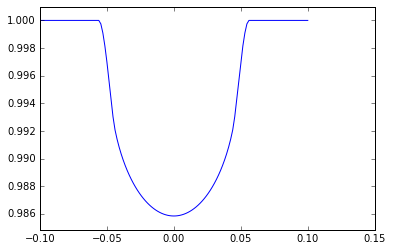

In [115]:
plt.plot(t,plflux)
plt.ylim(plflux.min()-0.001,plflux.max()+0.001)

In [116]:
#Add some noise:
np.random.seed(0)
lc1 = plflux + np.random.normal(0,.001,size=plflux.size)
np.random.seed(1)
lc2 = plflux + np.random.normal(0,.001,size=plflux.size)

(array([  8.,  25.,  13.,   8.,   7.,   2.,   3.,   7.,  34.,  26.]),
 array([ 0.98425619,  0.98602728,  0.98779837,  0.98956946,  0.99134055,
         0.99311165,  0.99488274,  0.99665383,  0.99842492,  1.00019601,
         1.0019671 ]),
 <a list of 10 Patch objects>)

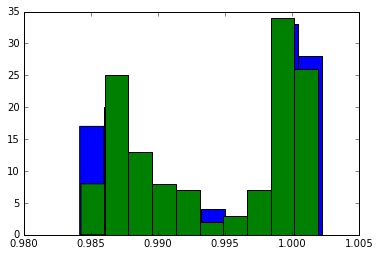

In [117]:
plt.hist(lc1)
plt.hist(lc2)

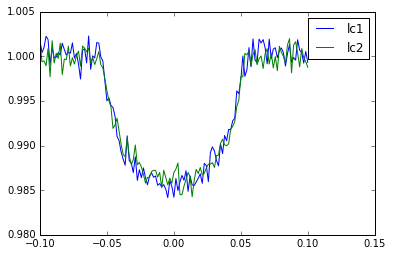

In [118]:
plt.figure()
plt.plot(t,lc1, label='lc1')
plt.plot(t,lc2, label='lc2')
plt.legend()

In [119]:
systematics = 0.0001*np.sin(2*t/0.002)

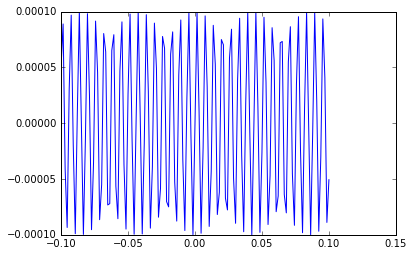

In [120]:
plt.plot(t,systematics)

In [121]:
# #Creating our source signal matrix
S1 = np.c_[lc1, systematics]
S2 = np.c_[lc2, systematics]

In [122]:
A = np.array([[.32, .5], [.2, .5]])  # Mixing matrix

In [123]:
X1 = np.dot(S1, A.T)  # Generate observations
X2 = np.dot(S2, A.T)

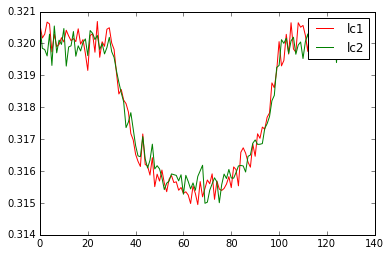

In [124]:
plt.plot(X1.T[0],color='red',label='lc1')
plt.plot(X2.T[0],color='green',label='lc2')
plt.legend()

In [125]:
mix_signals1 = DataFrame(X1.T)

In [126]:
mix_signals2 = DataFrame(X2.T)

In [127]:
mix_signals1

,0,1,2,3,4,5,6,7,8,9,...,123,124,125,126,127,128,129,130,131,132
0,0.320590,0.320173,0.320293,0.320670,0.320613,0.319736,0.320294,0.319902,0.319971,0.320181,...,0.320374,0.319773,0.320002,0.319871,0.320543,0.320200,0.320177,0.319774,0.320128,0.319759
1,0.200378,0.200124,0.200175,0.200401,0.200389,0.199853,0.200180,0.199920,0.199984,0.200132,...,0.200215,0.199857,0.200020,0.199923,0.200321,0.200119,0.200128,0.199866,0.200063,0.199840


In [128]:
mix_signals2

,0,1,2,3,4,5,6,7,8,9,...,123,124,125,126,127,128,129,130,131,132
0,0.320545,0.319849,0.319811,0.319610,0.320292,0.319312,0.320549,0.319707,0.320106,0.31997,...,0.320579,0.319401,0.320445,0.320531,0.320060,0.319601,0.320323,0.319962,0.319762,0.319581
1,0.200350,0.199922,0.199874,0.199739,0.200188,0.199588,0.200339,0.199798,0.200068,0.20000,...,0.200343,0.199624,0.200297,0.200335,0.200019,0.199745,0.200219,0.199984,0.199835,0.199729


In [129]:
transit1 = mix_signals1.T[0].values #transit 1
transit2 = mix_signals2.T[0].values #transit 2

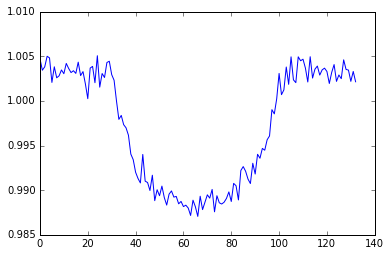

In [130]:
plt.plot(transit1/np.median(transit1))

In [131]:
transit1 = transit1/np.median(transit1)
transit2 = transit2/np.median(transit2)

In [132]:
observation = DataFrame([transit1,transit2]).T

In [133]:
observation.T

,0,1,2,3,4,5,6,7,8,9,...,123,124,125,126,127,128,129,130,131,132
0,1.004743,1.003435,1.003812,1.004996,1.004815,1.002066,1.003817,1.002588,1.002805,1.003463,...,1.004068,1.002185,1.002900,1.002489,1.004598,1.003521,1.003450,1.002186,1.003296,1.002139
1,1.004401,1.002219,1.002099,1.001471,1.003608,1.000537,1.004412,1.001775,1.003026,1.002599,...,1.004509,1.000817,1.004088,1.004356,1.002880,1.001443,1.003705,1.002575,1.001948,1.001380


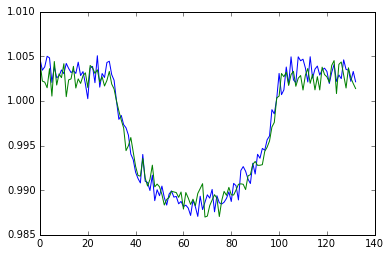

In [134]:
plt.plot(observation)

In [135]:
pwd

'/Users/walterwsmf/Dropbox/research/ica_project/lightcurve'

In [136]:
observation.T.to_csv('./synth_observations_1.csv')

In [139]:
hjd = DataFrame(t,columns=['time'])

In [142]:
hjd.to_csv('hjd.csv',index_label=False)